<p style="font-family: Arial; font-size:3em; font-style:bold; line-height:50px;">
Correlation of Development Indicators for Czech Republic and Slovakia before and after 1993</p>

# Czechoslovakia
<a href="https://en.wikipedia.org/wiki/Czechoslovakia">Czechoslovakia</a> was a Central European country from 1918 until its peaceful separation (sometimes dubbed the <i>velvet divorce</i>) into Czech and Slovak Republic (or Slovakia) on January 1st 1993. The location in the <i>heart of Europe</i> lead to an extremely interesting and dramatic history of this small country(ies). 

Here I will focus on if and how the velvet divorce in 1993 affected the evolution of the development indicators data for Czech Republic and Slovakia. The main question of this project is:

<b>Does the Czechoslovakia separation year 1993 correspond to any change in correlations between the world development indicators of Czech Republic and Slovakia? If so, which indicators have been most affected?</b>

Even during the times of Czechoslovakia, Czech Republic (hereafter also referred to as CZ) and Slovakia (SK) have always been two different states. They had different population (about 65% of the total population lived in the Czech part), industry, agriculture, etc.  However, until 1993 they have been part of one country with common government, currency, centralized economics, foreign trade, and others. The <i>World Development Indicators dataset</i> includes data on both Czech Republic and Slovakia separately (even before 1993). Here, I investigate if the division of Czechoslovakia in 1993 corresponds to any change in the evolution of the indicators for CZ and SK. It is expected that the evolution of some indicators is correlated between both countries while there might be no correlation for others. Has the relative evolution of indicators changed in 1993 when both countries started to be politically independent? Has one of the countries started developing substantially different than the other in 1993? Or the other way around -- have the two countries started evolving more similarly than before the separation (for example because the indicator started to be dominated by external influences)?

# Data
First I read the entire dataset:

In [4]:
import pandas as pd
import numpy as np
data_all = pd.read_csv('../input/Indicators.csv')

To obtain a list of all indicators, which will be useful later, in the data we run:

In [5]:
# list of all indicators
indicators = data_all['IndicatorName'].unique().tolist()
print("There is", len(indicators), "indicators in the complete data set.")

There is 1344 indicators in the complete data set.


Next, I filter data for CZ and SK:

In [6]:
filter_cz = data_all['CountryName'] == 'Czech Republic'
data_cz = data_all.loc[filter_cz]
print("Dataset for CZ has shape", data_cz.shape)

filter_sk = data_all['CountryName'] == 'Slovak Republic'
data_sk = data_all.loc[filter_sk]
print("Dataset for SK has shape", data_sk.shape)

Dataset for CZ has shape (19156, 6)
Dataset for SK has shape (17250, 6)


# Correlation of indicators before and after 1993
To compare the evolution of indicators for both countries, I will identify indicators for which both CZ and SK have sufficient data at the same years. I will compare only such indicators that have data for both CZ and SK for at least 10 same years before and 10 same years after 1993. For those indicators, I calculate the Pearson correlation coefficient between the values for CZ and SK before and also after 1993. Finally, I measure the change in the correlation of the indicator values by subtraction of the coefficient for the data before and after the division.

<p style="color:red; font-size:2em; font-style:bold; line-height:30px;">IMPORTANT NOTE</p> 
The Pearson correlation coefficient is generally not a proper way to characterize correlation in time series data --- see for example the discussion and links <a href="https://stats.stackexchange.com/a/133171">here</a>. The analysis I present here should be redone using more appropriate methods.

In [7]:
# minimal number of data-points for the indicator to be copared
n_min_pre = 10
n_min_post = 10
n_min = n_min_pre + n_min_post

I define a new data frame <i>corr_cs</i> to store the correlation coefficients. There are six columns: 
<ul>
    <li>corr_pre: correlation coefficient for data before 1993;</li>
    <li>corr_post: correlation coefficient for data after 1993;</li>
    <li>corr_diff: correlation coefficients subtracted = corr_pre-corr_post;</li>
    <li>n_pre: number of data-points before 1993;</li>
    <li>n_post: number of data-points after 1993;</li>
    <li>IndicatorName: indicator name (same as in the original data sets).</li>
</ul>

In [8]:
new_columns = ['corr_pre','corr_post','corr_diff','n_pre','n_post','IndicatorName']
corr_cs = pd.DataFrame()

Next let's loop over the indicators and calculate correlation coefficients for those with both countries having enough data.

In [9]:
for ind_i in indicators:
    # filter CZ and SK data for indicators
    f_cz = data_cz['IndicatorName'] == ind_i
    f_sk = data_sk['IndicatorName'] == ind_i
    
    if (sum(f_cz)>n_min) & (sum(f_sk)>n_min):
        # inner merge of data for CZ and SK
        ind_cz_sk = pd.merge(data_cz.loc[f_cz][['Year','Value']],
                             data_sk.loc[f_sk][['Year','Value']],
                             how='inner',
                             on='Year',
                             suffixes=('_cz', '_sk'))
        
        # filter data-points before and after 1993 (the separation happend on January 1st)
        f_pre = ind_cz_sk['Year']<1993
        f_post = 1993<=ind_cz_sk['Year']
        
        # calculate correlation for indicators where there is enough data before and after 1993
        if (sum(f_pre)>n_min_pre) & (sum(f_post)>n_min_post):
            corr_pre = (ind_cz_sk.loc[f_pre])['Value_cz'].corr((ind_cz_sk.loc[f_pre])['Value_sk'])
            corr_post = (ind_cz_sk.loc[f_post])['Value_cz'].corr((ind_cz_sk.loc[f_post])['Value_sk'])
            
            # check if the result is not NaN and append the result
            if ~np.isnan(corr_pre-corr_post):
                df_to_append = pd.DataFrame([[corr_pre, corr_post, corr_pre-corr_post, \
                                            sum(f_pre), sum(f_post), ind_i]], columns=new_columns)
                corr_cs = corr_cs.append(df_to_append, ignore_index=True)
                #print('{0:6.3f} {1:6.3f} {2:6.3f}'.format(corr_pre, corr_post, corr_pre-corr_post)+' '+\
                #      str(sum(f_pre))+' '+str(sum(f_post))+' '+ind_i)

In [10]:
print("Common indicators for CZ and SK before and after 1993, dataset shape:", corr_cs.shape)

Common indicators for CZ and SK before and after 1993, dataset shape: (57, 6)


Let's make few plots to see what is the distribution of correlation coefficient values.

In [11]:
# importing matplotlib first
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# make font little larger
font = {'family' : 'sans-serif',
        'size' : 16}
matplotlib.rc('font', **font)

First, I want to see the distributions of the correlation coefficients for both periods, i.e. before and after 1993.

In [12]:
def plot_hist_corr(file_out=None):
    """
    plot histograms of the correlation coefficients derived for indicators
    before and after the division
    -- specify file_out for the plot in an output file
    """
    hist_line = {'histtype':'step',
                'alpha':0.7,
                'range':(-1,1),
                'lw':2.5}

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.hist(corr_cs['corr_pre'],
             label='before division',
             **hist_line)
    plt.hist(corr_cs['corr_post'],
             ls='--',
             label='after division',
             **hist_line)

    plt.xlabel('correlation coefficient')
    plt.ylabel('indicators per bin')
    plt.legend(loc='upper left')
    plt.title('Distribution of correlation coefficients before and after 1993')
    
    if file_out is not None: plt.savefig(file_out)
    else: plt.show()

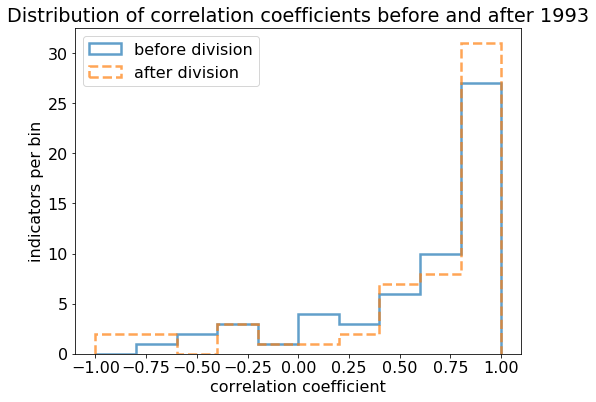

In [13]:
plot_hist_corr()

The plot above shows histograms of the correlation coefficients before and after the separation of Czechoslovakia in 1993. There are 57 coefficients plotted for each period. The distributions do not show any obvious differences.

To see if coefficients for any indicators changed, I will make a scatter plot taking the correlation coefficients before and after the division as the horizontal and vertical coordinates, respectively.

In [27]:
def plot_corr_scatter(file_out=None, title=None):
    """
    scatter plot with correlation coefficient before and after the division on the 
    horizontal and vertical axis, respectively.
    -- specify file_out for the plot in an output file
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    
    plt.scatter(corr_cs['corr_pre'], corr_cs['corr_post'],
               alpha=0.6,
               s=100)
    
    plt.axis('equal')
    plt.xlabel('before division')
    ax.xaxis.set_label_coords(0.95,0.44)
    plt.ylabel('after division', rotation=0)
    ax.yaxis.set_label_coords(0.5,1.02)
    if title is None: plt.title('Correlation coefficients between CZ and SK\n before versus after 1993', y=1.1)
    
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    ticks = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    #ax.yaxis.tick_left()
    #ax.xaxis.tick_bottom()
    
    if file_out is not None: 
        plt.tight_layout()
        plt.savefig(file_out, dpi=400)
    else: plt.show()

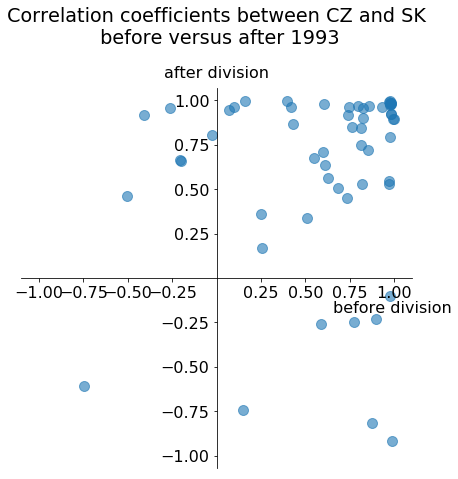

In [17]:
plot_corr_scatter()

From the above scatter plot, we see that most indicators are concentrated in the upper right corner, that is their value before as well as after the division is close to 1 (indicating a strong correlation). Potentially interesting are the two points in the lower right corner --- they were strongly correlated before the division while they are anti-correlated after. These indicators will also have largest subtraction of the coefficients (column <i>corr_diff</i> of the data frame <i>corr_cs</i>). Another interesting group of points are those with either coefficient close to 1 or -1 and with the other close to 0. This may imply that the indicators are strongly correlated for one of the periods while not correlated for the other.

Let's order the data frame according to the value of <i>corr_diff</i> and display the indicators with largest absolute value of the difference:

In [18]:
corr_cs = corr_cs.sort_values('corr_diff')
print(corr_cs.head())
print(corr_cs.tail())

    corr_pre  corr_post  corr_diff  n_pre  n_post  \
50 -0.406758   0.920838  -1.327596     11      22   
36 -0.261911   0.959019  -1.220930     22      21   
34 -0.506330   0.461867  -0.968197     22      20   
35  0.071034   0.948980  -0.877947     22      20   
1  -0.204408   0.665956  -0.870364     33      22   

                                        IndicatorName  
50    DEC alternative conversion factor (LCU per US$)  
36  Combustible renewables and waste (% of total e...  
34  CO2 emissions from residential buildings and c...  
35  CO2 emissions from transport (% of total fuel ...  
1   Age dependency ratio (% of working-age populat...  
    corr_pre  corr_post  corr_diff  n_pre  n_post  \
54  0.776416  -0.248869   1.025285     33      22   
28  0.977937  -0.099437   1.077374     33      22   
5   0.898453  -0.230132   1.128586     33      21   
19  0.876576  -0.817622   1.694197     33      22   
52  0.985057  -0.918277   1.903334     33      22   

                          

Both indicators in the lower right corner (ID 52 and 19) are related to population in largest city. Let's plot the evolution of these indicators.

In [29]:
# define colors and anmes for plotting of CZ and SK
colors = {'Czech Republic' : '#cb181d',
          'Slovak Republic' : '#41ab5d'}
names = {'Czech Republic' : 'CZ',
         'Slovak Republic' : 'SK'}

def plot_indicator_in_time(indicator_code, ylabel=None, title=None, plot_1993=True, file_out=None,
                          yscale=None):
    """
    Evolution of given indicator for CZ and SK.
    -- specify file_out for the plot in an output file
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for data_i in [data_cz, data_sk]:
        name_i = data_i['CountryName'].unique()[0]
        data_ind = data_i[data_i['IndicatorCode'] == indicator_code]
        if yscale is not None: val = data_ind['Value']/yscale
        else: val = data_ind['Value']
        plt.plot(data_ind['Year'], val,
                 color=colors[name_i],
                 label=names[name_i],
                 lw=3)
    
    ax.set_xlabel('Year')
    if ylabel is None: ylabel = data_ind['IndicatorName'].unique()[0]
    ax.set_ylabel(ylabel)
    
    if plot_1993:
        y_limits = ax.get_ylim()
        plt.plot([1993,1993],y_limits,
                lw=2,
                alpha=0.6,
                c='gray')
        plt.text(1993.5, 0.95*y_limits[1], '1993', color='gray', ha='left')
    
    if title is not None: ax.set_title(title)
    plt.legend()
    
    if file_out is not None: 
        plt.tight_layout()
        plt.savefig(file_out, dpi=400)
    else: plt.show()

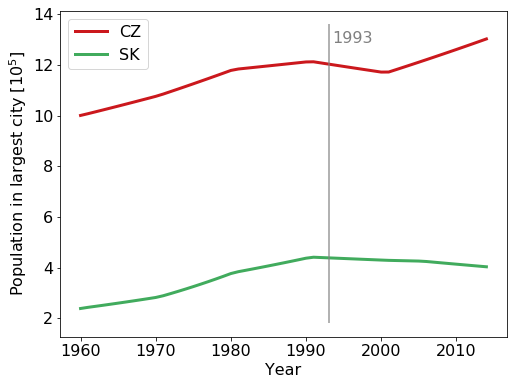

In [20]:
# Population in largest city
plot_indicator_in_time('EN.URB.LCTY', 
                      yscale=1e5,
                      ylabel='Population in largest city [$10^5$]')

The population in largest city (which are Prague for CZ and Bratislava for SK) seems to had a similar trend before 1993. After the division on the other hand, it has mostly increasing trend for CZ and a static or decreasing trend for SK. 

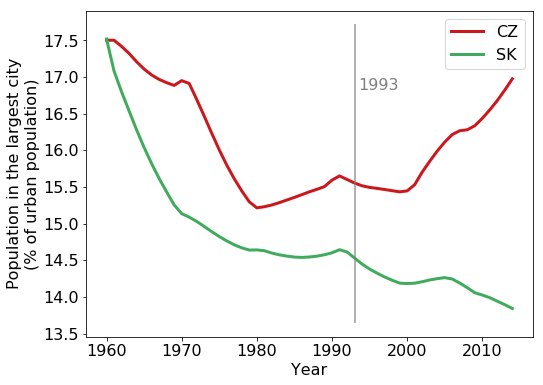

In [21]:
# Population in the largest city (% of urban population)
plot_indicator_in_time('EN.URB.LCTY.UR.ZS', 
                       ylabel='Population in the largest city\n(% of urban population)')

The above plot shows the percentage of the urban population that lives in the largest city. Here the different trends for CZ and SK are even more prominent than in the previous example with the absolute population in the largest city.

Next let's plot an indicator that has strong correlation for one of the periods (value close to 1 or -1) while no substantial correlation for the other (value close to 0). From the ordered data frame, we see that this is for example the indicator <i>CO2 emissions from transport (% of total fuel combustion)</i> (ID 35) with correlation coefficients of about 0.07 and 0.95 before and after the division.

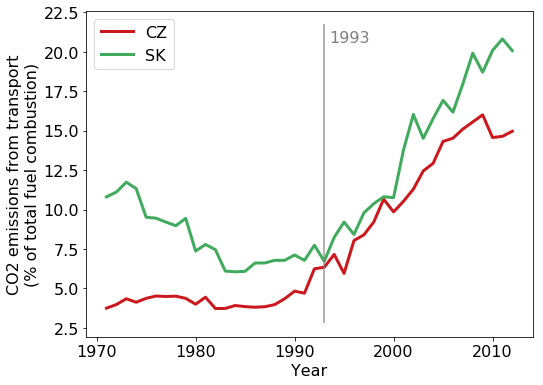

In [22]:
# CO2 emissions from transport (% of total fuel combustion)
plot_indicator_in_time('EN.CO2.TRAN.ZS',
                      ylabel='CO2 emissions from transport\n(% of total fuel combustion)')

Before the division, CZ had relatively stable fraction of total fuel combustion from CO2 transport emissions (with slight increase after about 1988). SK on the other hand was decreasing its emissions from about 12% in 1970 to about 7% in 1993. After the division, the CO2 emissions rapidly increased for both countries.

Other example of an indicator with that changed substantially might be <i>Death rate, crude (per 1,000 people)</i> (ID 5) with correlation coefficient of 0.9 before 1993, while about -0.2 after 1993.

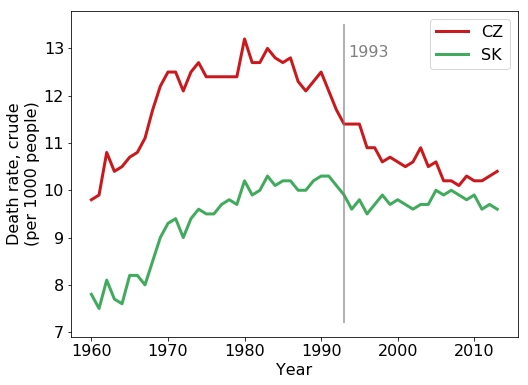

In [36]:
# Death rate, crude (per 1,000 people)
plot_indicator_in_time('SP.DYN.CDRT.IN',
                      ylabel='Death rate, crude\n(per 1000 people)')

We see that while the dead rate was generally increasing till 1993 in both countries, it is constant for SK or slowly increasing for CZ after 1993. However, the change in the trends may also be associated with an earlier year, about 1985, when the rate for CZ started decreasing and stabilized at a constant value (of about 10) for SK.

# Conclusions
Using the World Development Dataset, I analyzed the evolution of common indicators for Czech Republic and Slovakia. In particular, I focused on correlation coefficients between the indicators for the two countries and if some of those changed substantially in 1993 when Czechoslovakia was divided in Czech Republic and Slovakia.

I identified 57 indicators that have data for at least 10 common years for both CZ and SK, and for both periods -- before as well as after 1993. Correlations (measured by the Person correlation coefficient, which is generally not a proper indicator for correlation between time series, see above) between some of those indicators show change around 1993. For example, the fraction of urban population that lives in the largest city was generally decreasing before 1993 for both CZ and SK. After 1993, the fraction of Slovak urban population living in Bratislava is decreasing, while the fraction of Czech urban population living in Prague is increasing.

# Possible improvements
<ul>
    <li> Proper analysis of the correlation between time series: As I mentioned above, Pearson correlation coefficient is not a proper way to quantify correlation between time series.
    <li> Significance of the division timing: It would be interesting to test if a change of development of some indicators is timed by a year other than 1993.
    <li> Comparison with other countries: To gain deeper insight into the impact of the division of Czechoslovakia on the indicators evolution, it may be helpful to compare CZ and SK with other countries or groups (for example the EU or the Central European countries). 
    <li> Indicators for Czechoslovakia: The dataset does not include data for Czechoslovakia itself. They could be derived combining the data for CZ and SK (for example the average weighted by the population could be used for some indicators).
</ul>